In [1]:
%cd ~/code/projects/nn-play/
import numpy as np
import matplotlib.pyplot as plt
import imageio
import copy
from IPython.display import HTML
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/home/ira/code/projects/nn-play


## Why predict?

## Environment

In [2]:
from balls_sim import World, DEFAULT_SIM_CONFIG
gif_counter = 0

In [3]:
conf = copy.deepcopy(DEFAULT_SIM_CONFIG)
w = World(**conf)
gif_counter += 1
ims = []
for i in range(150):
    w.run()
    ims.append(w.draw())

imageio.mimsave("ims/{}.gif".format(gif_counter), ims)
HTML('<img src="../ims/{}.gif" width="140">'.format(gif_counter))


In [4]:
conf = copy.deepcopy(DEFAULT_SIM_CONFIG)
# conf['n_bodies'] = 5
conf['dynamics_noise'] = 0.1
w = World(**conf)
gif_counter += 1
ims = []
for i in range(150):
    w.run()
    ims.append(w.draw())

imageio.mimsave("ims/{}.gif".format(gif_counter), ims)
HTML('<img src="../ims/{}.gif" width="140">'.format(gif_counter))

In [5]:
conf = copy.deepcopy(DEFAULT_SIM_CONFIG)
conf['wall_action'] = 'bounce'
w = World(**conf)
gif_counter += 1
ims = []
for i in range(150):
    w.run()
    ims.append(w.draw())

imageio.mimsave("ims/{}.gif".format(gif_counter), ims)
HTML('<img src="../ims/{}.gif" width="140">'.format(gif_counter))

## Predictions using particle filter

In [6]:
from particle_filter import ParticleFilter

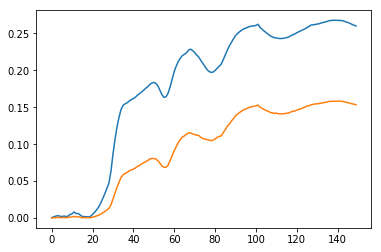

In [21]:
conf = copy.deepcopy(DEFAULT_SIM_CONFIG)
conf['wall_action'] = 'random'
conf['dynamics_noise'] = 0.01
conf['n_bodies'] = 2
conf['ball_action'] = 'bounce'

w = World(**conf)
gif_counter += 1

pf = ParticleFilter(conf, n_particles=500)

pos = [body.pos for body in w.bodies]
vel = [body.vel for body in w.bodies]
pf.warm_start(pos, vel)

ims = []
loss_mse = []
loss_mae = []

for i in range(150):
    if i < 20:
        pos = [body.pos for body in w.bodies]
        
        pf.update(pos)
        pf.resample()
    
    w.run()
    pf.predict()
    
    obs = w.draw()
    pred = pf.draw()[:,:,0]
    
    loss_mse.append(np.sqrt(np.mean((obs-pred)**2)))
    loss_mae.append(np.mean(np.sqrt((obs-pred)**2)))
    
    ims.append(np.concatenate((obs, pred), axis=1))

imageio.mimsave("ims/{}.gif".format(gif_counter), ims)
plt.plot(loss_mse)
plt.plot(loss_mae)

HTML('<img src="../ims/{}.gif" width="280">'.format(gif_counter))
